In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

### Get matched data of multi-spectral sensor and commercially calibrated Onset S-LIA-M003 PAR sensor

In [5]:
path = r"../data"
df_all = pd.read_csv(path + "/PAR_field_validation_experiment.csv", delimiter=";", index_col=False)
df_all["Timestamp"] = pd.to_datetime(df_all["Timestamp"], utc=True)

In [36]:
df_all_timeframe = df_all[df_all["Timestamp"] > pd.to_datetime("2025-03-28 08:00:00+0100")]
df_all_timeframe = df_all_timeframe[df_all_timeframe["Timestamp"] < pd.to_datetime("2025-03-28 20:00:00+0100")]

In [37]:
def as7341_convert_gain(gain: int) -> int:
    gain_mapping = {
        0: 0.5,
        1: 1,
        2: 2,
        3: 4,
        4: 8,
        5: 16,
        6: 32,
        7: 64,
        8: 128,
        9: 256,
        10: 512,
    }
    return gain_mapping.get(gain, gain)  # Return original gain if not found

In [38]:
df_all_timeframe["gain"] = df_all_timeframe["gain"].apply(as7341_convert_gain)

In [39]:
df_all_timeframe["f0_basic"] = df_all_timeframe["f0"]/(df_all_timeframe["tint"]*df_all_timeframe["gain"])
df_all_timeframe["f1_basic"] = df_all_timeframe["f1"]/(df_all_timeframe["tint"]*df_all_timeframe["gain"])
df_all_timeframe["f2_basic"] = df_all_timeframe["f2"]/(df_all_timeframe["tint"]*df_all_timeframe["gain"])
df_all_timeframe["f3_basic"] = df_all_timeframe["f3"]/(df_all_timeframe["tint"]*df_all_timeframe["gain"])
df_all_timeframe["f4_basic"] = df_all_timeframe["f4"]/(df_all_timeframe["tint"]*df_all_timeframe["gain"])
df_all_timeframe["f5_basic"] = df_all_timeframe["f5"]/(df_all_timeframe["tint"]*df_all_timeframe["gain"])
df_all_timeframe["f6_basic"] = df_all_timeframe["f6"]/(df_all_timeframe["tint"]*df_all_timeframe["gain"])
df_all_timeframe["f7_basic"] = df_all_timeframe["f7"]/(df_all_timeframe["tint"]*df_all_timeframe["gain"])
df_all_timeframe["clear_basic"] = df_all_timeframe["clear"]/(df_all_timeframe["tint"]*df_all_timeframe["gain"])
df_all_timeframe["nir_basic"] = df_all_timeframe["nir"]/(df_all_timeframe["tint"]*df_all_timeframe["gain"])


In [40]:
coef = [42.53793515129815,26.196803321906277,21.534256133457784,18.587432891582935,15.979575060790197,12.941260031805472,16.151259600136832,13.02367449025876,-7.540394705438988,0.42407612408490997]

df_all_timeframe["PAR"] = df_all_timeframe[["f0_basic","f1_basic","f2_basic","f3_basic","f4_basic","f5_basic","f6_basic","f7_basic","clear_basic","nir_basic"]].mul(coef, axis=1).sum(axis=1)

In [41]:
from sklearn.metrics import mean_squared_error
import numpy as np

r2 = r2_score(df_all_timeframe['PAR_Logger'], df_all_timeframe['PAR'])
print(f"R²: {r2*100:.3f}")
mape = np.mean(np.abs((df_all_timeframe['PAR_Logger'] - df_all_timeframe['PAR']) / df_all_timeframe['PAR_Logger'])) * 100
print(f"MAPE: {mape:.3f}")
rmse = np.sqrt(mean_squared_error(df_all_timeframe['PAR_Logger'], df_all_timeframe['PAR']))
nrmse = rmse / (df_all_timeframe['PAR'].max() - df_all_timeframe['PAR'].min())
print(f"NRMSE: {nrmse*100:.3f}")


R²: 97.424
MAPE: 8.762
NRMSE: 5.333


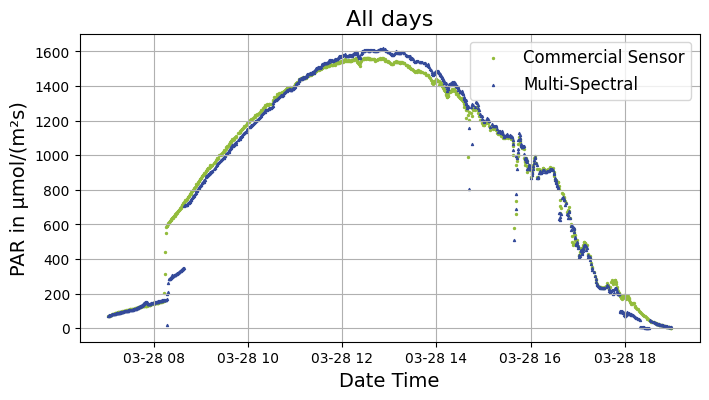

In [42]:
#plt.figure(figsize=(8, 4))
fig, ax1 = plt.subplots(figsize=(8, 4))

ax1.scatter(df_all_timeframe["Timestamp"], df_all_timeframe["PAR_Logger"], s=2, c="#93bc3c", label = "Commercial Sensor")
ax1.scatter(df_all_timeframe["Timestamp"], df_all_timeframe["PAR"], s=2, c="#344a9a", marker='^', label = "Multi-Spectral")

plt.title("All days", fontsize=16)
plt.xlabel("Date Time", fontsize=14)
ax1.set_ylabel("PAR in µmol/(m²s)", fontsize=14)

plt.legend(loc='upper right', fontsize=12)
plt.grid(visible=True, which='both', axis='both')
